In [2]:
def extract_html(url):
    page = urlopen(url)
    html_bytes = page.read()
    html = html_bytes.decode("utf-8")
    return html

In [304]:
def convert_title(title):
    remove_list=[' a ',' in ',' the ',' of ',' to ',' is ',' at ',' for ',' that ',' by ',' as ',' from ',' into ',
             ' on ',' with ',' off ',' this ',' up ',' like ']
    remove_list_start=['a-','in-','the-','of-','to-','is-','at-','for-','that-','by-','as-','from-','like-','this-',
                      'with-']
    remove_list_end=['-by','-to','-on','-is','-that','-before']
    remove_list2=['\'','.','!','(',')',',','/',':']

    suffix_list=['th ','st ','nd ','rd ']

    title=title.lower()
    for el in remove_list2: # delete special characters
        title=title.replace(el,'')
    for el in remove_list: # replace single words with a space
        title=title.replace(el,' ')
    title=title.replace(' ','-')
    title=title.replace('--','-')
    # delete words from the start
    for i in range(0,6):
        if title[:i] in remove_list_start:
            title=title[i:]
    # delete words end
    for i in range(0,8):
        if title[-i:] in remove_list_end:
            title=title[:-i]
    if title[0]=='-':
        title=title[1:]
    return title

In [3]:
import re
from urllib.request import urlopen

pattern1= 'hreflang="en">(.*?)</a>'
songs_titles=[]
for i in range(0,9):
    url = 'https://www.thebeatles.com/songs?page='+str(i)
    html=extract_html(url)
    a=re.findall(pattern1,html)
    for el in a:
        el=el.replace('&#039;', '\'')
        songs_titles.append(el)
songs_titles[0:10]

['12-Bar Original',
 '1822!',
 'A Beginning',
 'A Day In The Life',
 "A Hard Day's Night",
 'A Little Rhyme',
 'A Shot Of Rhythm And Blues',
 'A Taste Of Honey',
 'Across The Universe',
 'Act Naturally']

In [ ]:
import urllib.request as urllib2

remove_list=[' a ',' in ',' the ',' of ',' to ',' is ',' at ',' for ',' that ',' by ',' as ',' from ',' into ',
             ' on ',' with ',' off ',' this ',' up ',' like ']
remove_list_start=['a-','in-','the-','of-','to-','is-','at-','for-','that-','by-','as-','from-','like-','this-',
                  'with-']
remove_list_end=['-by','-to','-on','-is','-that','-before']
remove_list2=['\'','.','!','(',')',',','/',':']

for title in songs_titles:
    try:
        title=title.lower()
        for el in remove_list2: # delete special characters
            title=title.replace(el,'')
        for el in remove_list: # replace single words with a space
            title=title.replace(el,' ')
        title=title.replace(' ','-')
        title=title.replace('--','-')
        # delete words from the start
        for i in range(0,6):
            if title[:i] in remove_list_start:
                title=title[i:]
        # delete words end
        for i in range(0,8):
            if title[-i:] in remove_list_end:
                title=title[:-i]
        if title[0]=='-':
            title=title[1:]
        url='https://www.thebeatles.com/'
        query=extract_html(url+title)
        # write the extracted text in a .txt file
        file=open('raw_songs/'+title+'.txt','w+')
        file.write(query)
        file.close()
    except:
        print(title)

Hi ha a vegades que et pila la query del url tot i que la pàgina que correspon a la cançó té un afegit al final de -0 o -1, com el cas de la cançó que peta que és words-love-0

In [4]:
import re
from urllib.request import urlopen

In [5]:
pattern6='<div class="col-md-6 middle-content border-left border-right"><p>'
pattern7='<figure class="wp-block-table table-expander table table-imported">'
remove_list=['<br />','\n','</p>','<p>']

def extract_lyrics(song_path):
    song=open(song_path).read()
    idx_init = re.search(pattern6,song).end()
    idx_final = re.search(pattern7,song).start()
    lyrics=song[idx_init:idx_final]
    for el in remove_list: # delete special characters
        lyrics=lyrics.replace(el,' ')
    return lyrics

extract_lyrics('raw_songs/ob-la-di-ob-la-da.txt')

'Desmond has a barrow in the market place,  Molly is the singer in a band.  Desmond says to Molly, "Girl, I like your face,"  And Molly says this as she takes him by the hand:   Obladi, Oblada, life goes on, bra,  Lala how their life goes on.  Obladi, Oblada, life goes on, bra,  Lala how their life goes on.   Desmond takes a trolley to the jeweler\'s store,  Buys a twenty carat golden ring.  Takes it back to Molly waiting at the door,  And as he gives it to her she begins to sing:   Obladi, Oblada, life goes on, bra,  Lala how their life goes on.  Obladi, Oblada, life goes on, bra,  Lala how their life goes on.   In a couple of years,  They have built a home sweet home.  With a couple of kids running in the yard  Of Desmond and Molly Jones.   Happy ever after in the market place,  Desmond lets the children lend a hand.  Molly stays at home and does her pretty face,  and in the evening she still sings it with the band.   Obladi, Oblada, life goes on, bra,  Lala how their life goes on.  

In [6]:
extract_lyrics('raw_songs/yesterday.txt')

"Yesterday, all my troubles seemed so far away,  Now it looks as though they're here to stay,  Oh, I believe in yesterday   Suddenly, I'm not half the man I used to be  There's a shadow hanging over me  Oh, yesterday came suddenly   Why she had to go I don't know, she wouldn't say  I said something wrong, now I long for yesterday   Yesterday, love was such an easy game to play  Now I need a place to hide away  Oh, I believe in yesterday   Why she had to go I don't know, she wouldn't say  I said something wrong, now I long for yesterday   Yesterday, love was such an easy game to play  Now I need a place to hide away  Oh, I believe in yesterday,  Mm mm mm mm mm.   "

In [7]:
import os

In [10]:
txt_files = os.listdir('raw_songs')
songs_no_lyrics=[]
for el in txt_files:
    el=el[:-4]
    song_path='raw_songs/'+el+'.txt'
    try:
        lyrics=extract_lyrics(song_path)
        file=open('lyrics_songs/'+el+'.txt','w+')
        file.write(lyrics)
        file.close()
    except:
        songs_no_lyrics.append(el)
        print(el, end='\t')

lonesome-tears-my-eyes	three-cool-cats	Lucille	dizzy-miss-lizzy	memphis-tennessee	riding-bus	12-bar-original	set-fire-lot	lend-me-your-comb	kansas-city-hey-hey-hey-hey	baby-its-you	too-much-monkey-business	.DS_S	march-meanies	beatle-greetings	act-naturally	i-forgot-remember-forget	my-bonnie	revolution-9	i-just-dont-understand	pepperland-laid-waste	so-how-come-no-one-loves-me	fluff-you	twist-and-shout	ooh-my-soul	sure-fall-love-you	you-really-got-hold-me	nothin-shakin	hallelujah-i-love-her-so	glad-all-over	money-thats-what-i-want	cry-shadow	Boys	little-rhyme	Shout	have-banana	rip-it-shake-rattle-and-roll-blue-suede-shoes	anna-go-him	how-do-you-do-it	ill-be-my-way	im-gonna-sit-right-down-and-cry	keep-your-hands-my-baby	mailman-bring-me-no-more-blues	taste-honey	sweet-little-sixteen	dont-ever-change	hard-days-night	Carol	speech-brian-epstein	slow-down	dear-wack	rock-and-roll-music	crying-waiting-hoping	some-other-guy	aint-she-sweet	bad-boy	johnny-b-goode	searchin	mr-moonlight	day-life	sea

In [11]:
txt_files = os.listdir('raw_songs')
songs_no_lyrics=[]
for el in txt_files:
    song_path='raw_songs/'+el
    try:
        lyrics=extract_lyrics(song_path)
        file=open('lyrics_songs/'+el+'.txt','w+')
        file.write(lyrics)
        file.close()
    except:
        songs_no_lyrics.append(el)
len(songs_no_lyrics)

98

### Feature: Clean lyrics files

In [12]:
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

stop_words = list(set(stopwords.words('english')))
stop_words = [el.replace('\'','') for el in stop_words]
stop_words.append('im')


def clean_lyrics(file_path):
    data=open(file_path).read()
    # import WordPunctTokenizer() method from nltk
    # Create a reference variable for Class WordPunctTokenizer
    tk = WordPunctTokenizer()
    # define punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    # remove punctuation from the string
    no_punct = ""
    for char in data:
        if char not in punctuations:
            no_punct = no_punct + char
    # Remove all the special characters as \n and single = left
    char=['\n','=']
    for el in char:
        raw=re.sub(el,'',no_punct)
    # remove stop words
    token_txt = tk.tokenize(raw.lower()) # set to lower case
    token_txt = tk.tokenize(raw.lower()) # set to lower case
    token_final = [x for x in token_txt if x not in stop_words and len(x)>2]
    return token_final

In [340]:
lyrics_files=[el[:-4] for el in os.listdir('lyrics_songs')]
lyrics_files.remove('.DS_S') # remove this element that is introduced when using os.listdir
len(lyrics_files)

203

## Create network

In [155]:
import pandas as pd
#import Years .csv
Years=pd.read_csv('Songs_Years.csv')
Years=Years.iloc[0:301,:]
Years

,song,year
0,12-Bar Original,"Monday, 18th March, 1996"
1,1822!,"Wednesday, 30th November, 1994"
2,A Beginning,"Monday, 28th October, 1996"
3,A Day In The Life,"Thursday, 1st June, 1967"
4,A Hard Day's Night,"Friday, 10th July, 1964"
...,...,...
296,You'll Be Mine,"Monday, 20th November, 1995"
297,You're Going To Lose That Girl,"Friday, 6th August, 1965"
298,You've Got To Hide Your Love Away,"Friday, 6th August, 1965"
299,Young Blood,"Wednesday, 30th November, 1994"


In [300]:
int(beatles_dataset[beatles_dataset['Title']=='A Day in the Life']['Year'])

1967

In [305]:
convert_title('A Day In The Life')

'day-life'

In [302]:
Years[Years['song']=='A Day In The Life']

,song,year
3,A Day In The Life,"Thursday, 1st June, 1967"


In [294]:
idx=0
for el in beatles_dataset['Title']:
    if el in list(Years['song']):
        int(beatles_dataset[beatles_dataset['Title']==el]['Year'])
        beatles_dataset['Title']
        Years.iloc[idx,1]=Years

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1


In [156]:
Years.iloc[0,1]

'Monday, 18th March, 1996          '

Extract Year, Month and Day from dates

In [157]:
a=Years[Years['song']=='12-Bar Original']['year'][0]
a=a.replace(' ','')
Year=a[-4:]
Month=a[re.search('th',a).end():-5]
Day=a[re.search('th',a).start()-1:re.search('th',a).start()]

In [159]:
len(Years)

301

In [190]:
songs=[]; years=[]; months=[]; days=[]

remove_list=[' a ',' in ',' the ',' of ',' to ',' is ',' at ',' for ',' that ',' by ',' as ',' from ',' into ',
             ' on ',' with ',' off ',' this ',' up ',' like ']
remove_list_start=['a-','in-','the-','of-','to-','is-','at-','for-','that-','by-','as-','from-','like-','this-',
                  'with-']
remove_list_end=['-by','-to','-on','-is','-that','-before']
remove_list2=['\'','.','!','(',')',',','/',':']

suffix_list=['th ','st ','nd ','rd ']

idx=0
for Title in Years['song']:
    title=convert_title(Title)
    songs.append(title)
    # extract dates
    a=Years.iloc[idx,1]
    idx+=1
    # a=a.replace(' ','')
    years.append(a[-14:-10])
    for el in suffix_list:
        try:
            months.append(a[re.search(el,a).end():-16])
            days.append(a[re.search(el,a).start()-2:re.search(el,a).start()])
        except:
            pass

In [192]:
d={'song':songs,'year':years,'month':months,'day':days}
dates_df=pd.DataFrame(d)
dates_df

,song,year,month,day
0,12-bar-original,1996,March,18
1,1822,1994,November,30
2,beginning,1996,October,28
3,day-life,1967,June,1
4,hard-days-night,1964,July,10
...,...,...,...,...
296,youll-be-mine,1995,November,20
297,youre-going-lose-girl,1965,August,6
298,youve-got-hide-your-love-away,1965,August,6
299,young-blood,1994,November,30


In [1]:

months_value={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,
             'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
months_sorted=years_sorted.replace({'month': months_value}).sort_values(by=['year','month','day']).index
dates_df.reindex(months_sorted)[-90:-80]


NameError: name 'years_sorted' is not defined

In [335]:
d_top5={}
for file in lyrics_files:
    path='lyrics_songs/'+file+'.txt'
    clean=clean_lyrics(path)
    top5=[]
    for el in FreqDist(clean).most_common(5):
        top5.append(el[0])
    d_top5[file]=top5

In [256]:
hyperlinks={} #dictionary to store links 
for file1 in lyrics_files:
    eq_files=[]
    for file2 in lyrics_files:
        if file1!=file2:
            a=d_top5[file1]
            b=d_top5[file2]
            # compute if there are equal words in both lists
            eq=0
            for el in a:
                if el in b:
                    eq+=1
            if eq!=0:
                eq_files.append(file2)
    idx1=dates_df[dates_df['song']==file1].index[0]
    eq_files_later=[]
    for eq in eq_files:
        idx2=dates_df[dates_df['song']==eq].index[0]
        if idx1<idx2: # means that file1 song was released earlier
            eq_files_later.append(eq)
    hyperlinks[file1]=eq_files_later

Testeo:
hyperlinks={} #dictionary to store links 
for file1 in lyrics_files:
    for file2 in lyrics_files:
        if file1!=file2:
            a=d_top5[file1]
            b=d_top5[file2]
            # compute if there are equal words in both lists
            eq=0
            for el in a:
                if el in b:
                    eq+=1
            if eq!=0:
                # find which song was released before
                idx1=dates_df[dates_df['song']==file1].index[0]
                idx2=dates_df[dates_df['song']==file2].index[0]
                if idx1<idx2: # means that file1 song was released earlier
                    hyperlinks[file1]=file2
                else:
                    hyperlinks[file2]=file1

In [270]:
len(lyrics_files)

203

In [261]:
import networkx as nx
#We build the Directed Network
Beatles_nw= nx.DiGraph()
for file in lyrics_files:
    #We add the nodes and attributes to the the network
    Beatles_nw.add_node(file)


#We add the hyperlinks to the the network
for el in hyperlinks:
    links= hyperlinks[el]
    for a in links:
        u= el
        v= a
        Beatles_nw.add_edge(u,v)

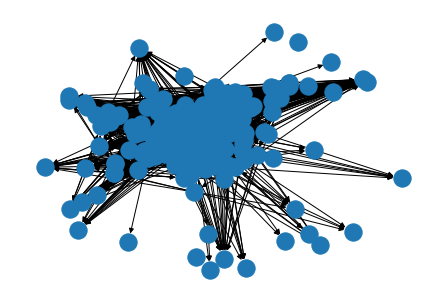

In [262]:
nx.draw(Beatles_nw)

### Extract GCC

In [263]:
Gs = list(Beatles_nw.subgraph(c).copy() for c in nx.weakly_connected_components(Beatles_nw))
biggest = 0
GCC_index = 0
for index,graph in enumerate(Gs):
    if len(graph.nodes) > biggest:
        biggest = len(graph.nodes)
        GCC_index = index
GCC = Gs[GCC_index]

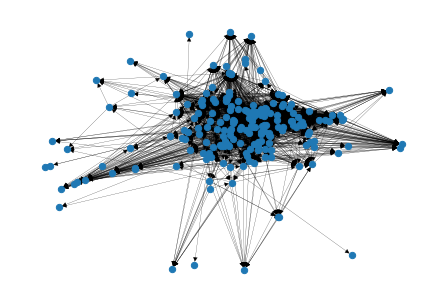

In [264]:
options = {
    'node_size': 40,
    'width': 0.2
}
nx.draw(GCC,**options)

#### Convert to undirected network

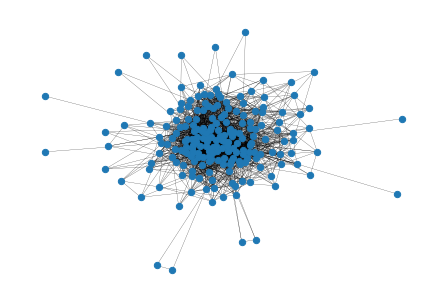

In [266]:
un_Beatles_nw= GCC.to_undirected()

options = {
    'node_size': 40,
    'width': 0.2,
}
nx.draw(un_Beatles_nw,**options)

Still needs to be define a criteria to link two songs. Right now the criteria is that if between the most 5 common words one is present in both songs, these songs are linked.

## Create network evolution by time

In [344]:
d_top5={}
for file in lyrics_files:
    if file=='taste-honey':
        print('YAS')
    path='lyrics_songs/'+file+'.txt'
    clean=clean_lyrics(path)
    top5=[]
    for el in FreqDist(clean).most_common(5):
        top5.append(el[0])
    d_top5[file]=top5

In [364]:
years=np.unique(list(dates_df['year']))
lyrics_files=[]
options = {
    'node_size': 40,
    'width': 0.2}

for idx,year in enumerate(years):
    a=list(dates_df[dates_df['year']==year]['song'])
    for el in a:
        lyrics_files.append(el)
        
    hyperlinks={} #dictionary to store links 
    for file1 in lyrics_files:
        eq_files=[]
        for file2 in lyrics_files:
            if file1!=file2:
                try:
                    a=d_top5[file1]
                    b=d_top5[file2]
                    # compute if there are equal words in both lists
                    eq=0
                    for el in a:
                        if el in b:
                            eq+=1
                    if eq!=0:
                        eq_files.append(file2)
                except:
                    pass
        idx1=dates_df[dates_df['song']==file1].index[0]
        eq_files_later=[]
        for eq in eq_files:
            idx2=dates_df[dates_df['song']==eq].index[0]
            if idx1<idx2: # means that file1 song was released earlier
                eq_files_later.append(eq)
        hyperlinks[file1]=eq_files_later
        
    #build the network
    Beatles_nw= nx.DiGraph()
    for file in lyrics_files:
        #We add the nodes and attributes to the the network
        Beatles_nw.add_node(file)
    #We add the hyperlinks to the the network
    for el in hyperlinks:
        links= hyperlinks[el]
        for a in links:
            u= el
            v= a
            Beatles_nw.add_edge(u,v)
            
    print('nodes:',len(Beatles_nw.nodes()))  
    print('edges:',len(Beatles_nw.edges()))    
    #nx.draw(Beatles_nw,**options)
    #plt.savefig("Graph"+str(idx)+".png")


nodes: 2
edges: 1
nodes: 34
edges: 67
nodes: 65
edges: 307
nodes: 96
edges: 594
nodes: 112
edges: 830
nodes: 136
edges: 1084
nodes: 171
edges: 1592
nodes: 204
edges: 2086
nodes: 214
edges: 2242
nodes: 217
edges: 2304
nodes: 261
edges: 2324
nodes: 281
edges: 2427
nodes: 294
edges: 2630
nodes: 295
edges: 2631
nodes: 296
edges: 2631
nodes: 298
edges: 2687
nodes: 301
edges: 2760


2760


In [338]:
d_top5['taste-honey']

KeyError: 'taste-honey'

In [321]:
list(dates_df[dates_df['year']==years[0]]['song'])

['love-me-do', 'ps-i-love-you']

In [ ]:
hyperlinks={} #dictionary to store links 
for file1 in lyrics_files:
    eq_files=[]
    for file2 in lyrics_files:
        if file1!=file2:
            a=d_top5[file1]
            b=d_top5[file2]
            # compute if there are equal words in both lists
            eq=0
            for el in a:
                if el in b:
                    eq+=1
            if eq!=0:
                eq_files.append(file2)
    idx1=dates_df[dates_df['song']==file1].index[0]
    eq_files_later=[]
    for eq in eq_files:
        idx2=dates_df[dates_df['song']==eq].index[0]
        if idx1<idx2: # means that file1 song was released earlier
            eq_files_later.append(eq)
    hyperlinks[file1]=eq_files_later

## Sort network by degree

In [267]:
Sorted_degree=dict(sorted(un_Beatles_nw.degree, key=lambda x: x[1], reverse=True))
Sorted_degree

{'love-me-do': 76,
 'my-life': 75,
 'means-lot': 73,
 'do-you-want-know-secret': 72,
 'ask-me-why': 71,
 'dreamers-do': 70,
 'here-there-and-everywhere': 69,
 'i-feel-fine': 69,
 'i-dont-want-spoil-party': 68,
 'i-should-have-known-better': 67,
 'i-will': 67,
 'shes-woman': 64,
 'she-loves-you': 62,
 'you-know-what-do': 61,
 'end': 61,
 'old-brown-shoe': 61,
 'no-one': 60,
 'dont-pass-me': 60,
 'youve-got-hide-your-love-away': 59,
 'cant-buy-me-love': 59,
 'thank-you-girl': 58,
 'things-we-said-today': 57,
 'within-you-without-you': 57,
 'all-you-need-love': 55,
 'long-long-long': 54,
 'love-you': 54,
 'real-love': 54,
 'if-i-fell': 53,
 'you-blue': 53,
 'ps-i-love-you': 53,
 'not-second-time': 52,
 'ill-be-back': 52,
 'boy': 52,
 'its-only-love': 51,
 'step-inside-love-los-paranoias': 51,
 'its-all-too-much': 49,
 'if-i-needed-someone': 49,
 'word': 48,
 'and-i-love-her': 48,
 'something': 47,
 'please-please-me': 47,
 'she-said-she-said': 47,
 'dont-let-me-down': 46,
 'i-call-your-na

In [21]:
d_top5['dont-pass-me']

['make', 'love', 'see', 'pass', 'cry']

In [22]:
d_top5['love-me-do']

['love', 'know', 'ill', 'always', 'true']

In [23]:
d_top5['i-feel-fine']

['know', 'said', 'love', 'feel', 'fine']

In [25]:
d_top5['yellow-submarine']

['yellow', 'submarine', 'live', 'sea', 'lived']

#### Plot degree distribution

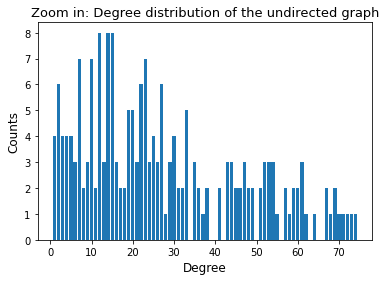

In [269]:
import matplotlib.pyplot as plt
import numpy as np
#FROM UNDIRECTED TO DIRECTED GRAPH:
un_Beatles_nw= GCC.to_undirected()
all_degrees=[]

#Obtenition of degree 
for deg in un_Beatles_nw.degree():
    all_degrees.append(deg[1])
    
#Zoom in
v = np.arange(int(min(all_degrees)),max(Sorted_degree.values()))
count,bins=np.histogram(all_degrees,bins=v)
plt.bar(bins[:-1], count)
plt.title('Zoom in: Degree distribution of the undirected graph',fontsize=13)
plt.xlabel('Degree',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.show() 

## Find communities

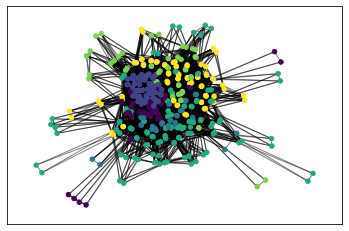

In [45]:
import community.community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# compute the best partition
partition = community.community_louvain.best_partition(un_Beatles_nw)

# draw the graph
pos = nx.spring_layout(un_Beatles_nw)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(un_Beatles_nw, pos, partition.keys(), node_size=20,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(un_Beatles_nw, pos, alpha=0.5)
plt.show()

In [46]:
print('Number of communities found: ', len(np.unique(list(partition.values()))))

Number of communities found:  6


In [47]:
print('Modularity:', np.round(community.community_louvain.modularity(partition,un_Beatles_nw),4))

Modularity: 0.3312


In [48]:
# we compute the number of characters in every community in order to find the top 5
communities_d=dict.fromkeys(list(range(0,len(np.unique(list(partition.values()))))))
for i in range(0,len(np.unique(list(partition.values())))):
    l=[]
    for el in partition:
        if partition[el]==i:
            l.append(el)
    communities_d[i]=l
    
size_communities=[len(x) for x in communities_d.values()]

size_communities

[50, 86, 32, 112, 50, 72]

Extract the most common words for each community

In [49]:
communities_d[4][0:10]

['i-need-you',
 'i-need-you.txt',
 'im-only-sleeping',
 'continuing-story-bungalow-bill.txt',
 'im-only-sleeping.txt',
 'when-i-get-home',
 'come-together',
 'ticket-ride',
 'strawberry-fields-forever',
 'hey-bulldog.txt']

Most common words in each community (counting the time each word appears)

In [50]:
for idx in communities_d:
    community_words=[]
    for el in communities_d[idx]:
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        for word in clean:
            community_words.append(word)
    print(FreqDist(community_words).most_common(5))

[('know', 366), ('say', 98), ('name', 84), ('lonely', 66), ('hello', 66)]
[('love', 696), ('know', 156), ('cant', 94), ('need', 90), ('say', 88)]
[('see', 140), ('ooh', 70), ('better', 64), ('time', 56), ('goo', 42)]
[('baby', 152), ('girl', 134), ('come', 114), ('little', 110), ('man', 108)]
[('got', 152), ('ive', 108), ('let', 96), ('yeah', 80), ('please', 44)]
[('yeah', 258), ('ill', 158), ('want', 140), ('well', 102), ('long', 88)]


Most common words in each community (counting the number of song a word appear)

In [51]:
for idx in communities_d:
    community_words=[]
    for el in communities_d[idx]:
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        unique=list(np.unique(clean))
        for word in unique:
            community_words.append(word)
    print('size:' ,size_communities[idx])
    print(FreqDist(community_words).most_common(5))

size: 50
[('know', 42), ('love', 14), ('like', 14), ('time', 14), ('one', 14)]
size: 86
[('love', 86), ('know', 54), ('see', 36), ('want', 30), ('say', 26)]
size: 32
[('see', 26), ('get', 16), ('day', 14), ('never', 14), ('say', 14)]
size: 112
[('know', 34), ('see', 30), ('like', 28), ('love', 28), ('time', 26)]
size: 50
[('got', 24), ('know', 22), ('time', 22), ('ive', 22), ('please', 18)]
size: 72
[('ill', 34), ('want', 32), ('well', 28), ('know', 28), ('like', 28)]


### Feature: most common words of a given community (times a song contains a word)

In [52]:
def community_words(community):
    community_words=[]
    for el in community:
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        unique=list(np.unique(clean))
        for word in unique:
            community_words.append(word)
    return FreqDist(community_words).most_common(5)

community_words(communities_d[0])

[('know', 42), ('love', 14), ('like', 14), ('time', 14), ('one', 14)]

### Feature: introduce a famous song and find in which community it belongs

In [53]:
def song_community(song):
    i=0
    for idx in communities_d:
        if song in communities_d[i]:
            return i
        i+=1
        
song_community('let-it-be')

4

In [64]:
community_words(communities_d[song_community('let-it-be')])

[('got', 24), ('know', 22), ('time', 22), ('ive', 22), ('please', 18)]

## VADER sentimental analysis

In [55]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [57]:
file=open('lyrics_songs/youll-be-mine.txt').read()
file

"Well darling all the night  You'll be mine and I know  You'll be mine until you die  You'll be mine   And so  (And so)  All the night  (All the night)  You'll be mine  (You'll be mine)  You'll be mine  And the stars  (And the stars)  Always shine  (Always shine)  You'll be mine   My darling, when you brought me  That toast the other morning  I, I looked into your eyes  And I could see a nice little healthy eyeball  And I loved you like I never done  Like I've never done before!   And the stars  (And the stars)  Always shine  (Always shine)  And you'll be mine  [Incomprehensible] you'll be mine  You'll be mine  At the start  (At the start)  Oh yes, you'll be   "

In [58]:
sentences=[]
index=[(m.start(0), m.end(0)) for m in re.finditer('  ',file)]
for i in range(0,len(index)-1):
    a=file[index[i][1]:index[i+1][0]]
    sentences.append(a)

In [65]:
def song_Vader(song):
    # extract sentence of each song
    file=open('lyrics_songs/'+song+'.txt').read()
    sentences=[]
    index=[(m.start(0), m.end(0)) for m in re.finditer('  ',file)]
    for i in range(0,len(index)-1):
        a=file[index[i][1]:index[i+1][0]]
        sentences.append(a)
    # compute sentiment analysis for sentence
    analyzer = SentimentIntensityAnalyzer()
    compound1=[]
    compound2=[]
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        # take every sentence value (more robust)
        compound1.append(vs['compound'])
        # take just the sentences that are not neutral
        if vs['compound']!=0:
            compound2.append(vs['compound'])
        # print("{:-<65} {}".format(sentence, str(vs)))
    return np.mean(compound1),np.mean(compound2)

song_Vader('let-it-be')[0]

0.08556285714285713

In [61]:
open('lyrics_songs/'+'let-it-be'+'.txt').read()

'When I find myself in times of trouble  Mother Mary comes to me  Speaking words of wisdom  Let it be.   And in my hour of darkness  She is standing right in front of me  Speaking words of wisdom  Let it be.   Let it be, let it be, let it be, let it be  Whisper words of wisdom  Let it be.   And when the broken-hearted people  Living in the world agree  There will be an answer  Let it be.   For though they may be parted there is  Still a chance that they will see  There will be an answer  Let it be.   Let it be, let it be, let it be, let it be  There will be an answer  Let it be.   And when the night is cloudy  There is still a light that shines on me  Shine until tomorrow  Let it be.   I wake up to the sound of music  Mother Mary comes to me  Speaking words of wisdom  Let it be.   Let it be, let it be, let it be, let it be  There will be an answer  Let it be.   Let it be, let it be, let it be, let it be  Whisper words of wisdom  Let it be...   '

In [ ]:
sentenceDic = {}
for name in dialogues:
    sentenceDic[name] = []
    for line in dialogues[name]:
        sentence = re.split(r'[.!?]+ *',line)
        sentenceDic[name].extend(sentence)

In [ ]:
def sentiment_score_VADER(sentence):
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

In [ ]:
sentiment_score_VADER('Oh yes, you\'ll be.')

In [ ]:
for idx in communities_d:
    for el in communities_d[idx]:
        

In [286]:
beatles_dataset

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1
...,...,...,...,...,...,...,...,...,...
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1


In [285]:
beatles_dataset=pd.read_csv('Beatles_Dataset.csv')
min(beatles_dataset['Year'])
max(beatles_dataset['Year'])

1980

In [291]:
len(np.unique(list(beatles_dataset['Album.debut'])))

55

In [292]:
list(beatles_dataset['Album.debut'])

['Anthology 2',
 "Sgt. Pepper's Lonely Hearts Club Band",
 "UK: A Hard Day's Night US: 1962-1966",
 'Live at the BBC',
 'UK: Please Please Me US: The Early Beatles',
 'Let It Be',
 'UK: Help! US: Yesterday and Today',
 'Anthology 1',
 'UK: With the Beatles US: Meet The Beatles!',
 'UK: With the Beatles US: Meet The Beatles!',
 'Anthology 3',
 'Yellow Submarine',
 'Magical Mystery Tour',
 "UK: A Hard Day's Night US: Something New",
 'UK: Revolver US: Yesterday and Today',
 'UK: Please Please Me US: The Early Beatles',
 'Help!',
 "UK: A Hard Day's Night US: Something New",
 'UK: Please Please Me US: The Early Beatles',
 'UK: Please Please Me US: The Early Beatles',
 "UK: Beatles for Sale US: Beatles '65",
 'Magical Mystery Tour',
 'The Beatles',
 'UK: A Collection of Beatles Oldies US: Beatles VI',
 'The Beatles Bootleg Recordings 1963',
 'On Air - Live at the BBC Volume 2',
 'Let It Be... Naked - Fly on the Wall bonus disc',
 'Abbey Road',
 "Sgt. Pepper's Lonely Hearts Club Band",
 'The